<a href="https://colab.research.google.com/github/uzma-knpc/Generative-AI/blob/main/MimagesDiagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Medical Images Diagnosis

In [50]:
!pip install -Uq facenet-pytorch
!pip install -Uq pillow




ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires Pillow<10.3.0,>=10.2.0, but you have pillow 11.1.0 which is incompatible.


In [51]:
import torch
import torch.nn as nn
import torchvision.models as models

import torchvision.transforms as transforms
from PIL import Image

In [52]:
from facenet_pytorch import MTCNN, InceptionResnetV1

model = InceptionResnetV1(pretrained='vggface2').eval()


In [53]:
# Preprocessing function to transform the image into a tensor
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)

# Function to create image embeddings
def create_image_embedding(image_path):
    try:
        input_tensor = preprocess_image(image_path)
        with torch.no_grad():
            embeddings = model(input_tensor)# ebedding important line
        return embeddings.squeeze().numpy()
    except Exception as e:
        print("Error:", e)
        return None

In [54]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [55]:
# prompt: create python function where we provide image url and imag_name then it save in images folder

import requests
import os

def save_image_from_url(image_url, image_name):
  """
  Downloads an image from a URL and saves it to the 'images' folder.

  Args:
    image_url: The URL of the image to download.
    image_name: The name of the file to save the image as.
  """
  try:
    if not os.path.exists("images"):
      os.makedirs("images")

    image_path = os.path.join("images", image_name)

    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

   #chunks
    with open(image_path, 'wb') as file:
      for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

    print(f"Image saved to: {image_path}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
  except Exception as e:
    print(f"An error occurred: {e}")


# Images loaded from net

In [62]:
save_image_from_url("https://prod-images-static.radiopaedia.org/images/48689902/0c2f5f49d11eb7d8a898cd79a70054_gallery.jpeg", "Nlung.jpg")
save_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRD5qEm-UkPtDgjsuQVDSKFPSF4izu6npoWfA&s", "MAG3scan.jpg")
save_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRC9F_G4u8lJJ8O-c00QZp7AdhzPPhNxPDdKA&s","DMSAscan.jpg")
save_image_from_url("https://ars.els-cdn.com/content/image/1-s2.0-S1930043318306022-gr1.jpg","lungscan.jpg")
#save_image_from_url("https://img.medscapestatic.com/pi/meds/ckb/51/26751tn.jpg","Bonescan.jpg","BS.jpg")
save_image_from_url("https://ars.els-cdn.com/content/image/1-s2.0-S0001299823000296-gr2.jpg",'Thyroidscan.jpg')
#print("Image saved to:"/Users/uzmailyas/thy.jpeg",image_path)
save_image_from_url("https://pub.mdpi-res.com/applsci/applsci-12-00698/article_deploy/html/images/applsci-12-00698-g001.png?1642052715","RenelScan.jpg")

Image saved to: images/Nlung.jpg
Image saved to: images/MAG3scan.jpg
Image saved to: images/DMSAscan.jpg
Image saved to: images/lungscan.jpg
Image saved to: images/Thyroidscan.jpg
Image saved to: images/RenelScan.jpg


# EMBEDDING

In [63]:
d = create_image_embedding("./images/DMSAscan.jpg")
m = create_image_embedding("./images/MAG3scan.jpg")
l = create_image_embedding("./images/lungscan.jpg")
n = create_image_embedding("./images/Nlung.jpg")
t = create_image_embedding("./images/Thyroidscan.jpg")
r = create_image_embedding("./images/RenelScan.jpg")

In [13]:
!pip install -U milvus-lite

!pip install -U pymilvus


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.68.1
    Uninstalling grpcio-1.68.1:
      Successfully uninstalled grpcio-1.68.1


In [64]:
# Paths to your uploaded images and titles
file_paths = [
    "images/DMSAscan.jpg",
    "images/MAG3scan.jpg",
    "images/lungscan.jpg",
    "images/Thyroidscan.jpg",
    "images/RenelScan.jpg" ,
    "images/Nlung.jpg" ,  # Replace with actual file paths for each image

]
titles = [
    "DMSA Scan (ID: 1)",
    "MAG3 Scan (ID: 2)",
    "Lung Scan (ID: 3)",
    "Thyroid Scan (ID: 4)",
    "Renal Scan (ID: 5)",
    "NormalScan (ID: 6)",
]

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Define a function to load and process images
def load_image(file_path):
    """
    Load the image using PIL and convert it to a numpy array.
    """
    img = Image.open(file_path).convert("L")  # Convert to grayscale
    img_array = np.array(img)
    return img_array

# Normalize the image
def normalize_image(img):
    """
    Normalize the image intensity to range [0, 1] for consistent display.
    """
    img_min, img_max = img.min(), img.max()
    normalized_img = (img - img_min) / (img_max - img_min)
    return normalized_img



In [69]:
# Define a simple diagnostic function
def diagnose_image(img):
    """
    Diagnose the image based on intensity statistics.
    Example criteria:
    - If mean intensity > threshold, classify as 'Abnormal'
    """
    mean_intensity = np.mean(img)
    std_intensity = np.std(img)
    threshold_mean = 0.9  # Example threshold for mean intensity
    threshold_std = 0.1   # Example threshold for standard deviation

    if mean_intensity > threshold_mean or std_intensity > threshold_std:
        return "Abnormal scan detected"
    else:
        return "Scan appears normal"



In [70]:
# Display the images with diagnostics
def display_actual_images_with_diagnosis(file_paths, titles):
    """
    Display the actual medical images with diagnostic results.
    """
    rows = 2
    cols = 3
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, (file_path, title) in enumerate(zip(file_paths, titles)):
        if i >= len(axes):  # Stop if there are more files than slots
            break
        img = load_image(file_path)  # Load the image
        normalized_img = normalize_image(img)  # Normalize it for consistent display

        # Perform diagnosis
        diagnosis = diagnose_image(normalized_img)

        # Plot the image
        ax = axes[i]
        im = ax.imshow(normalized_img, cmap='gray')  # Use grayscale colormap
        ax.set_title(f"{title}\n{diagnosis}")
        ax.axis('off')

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



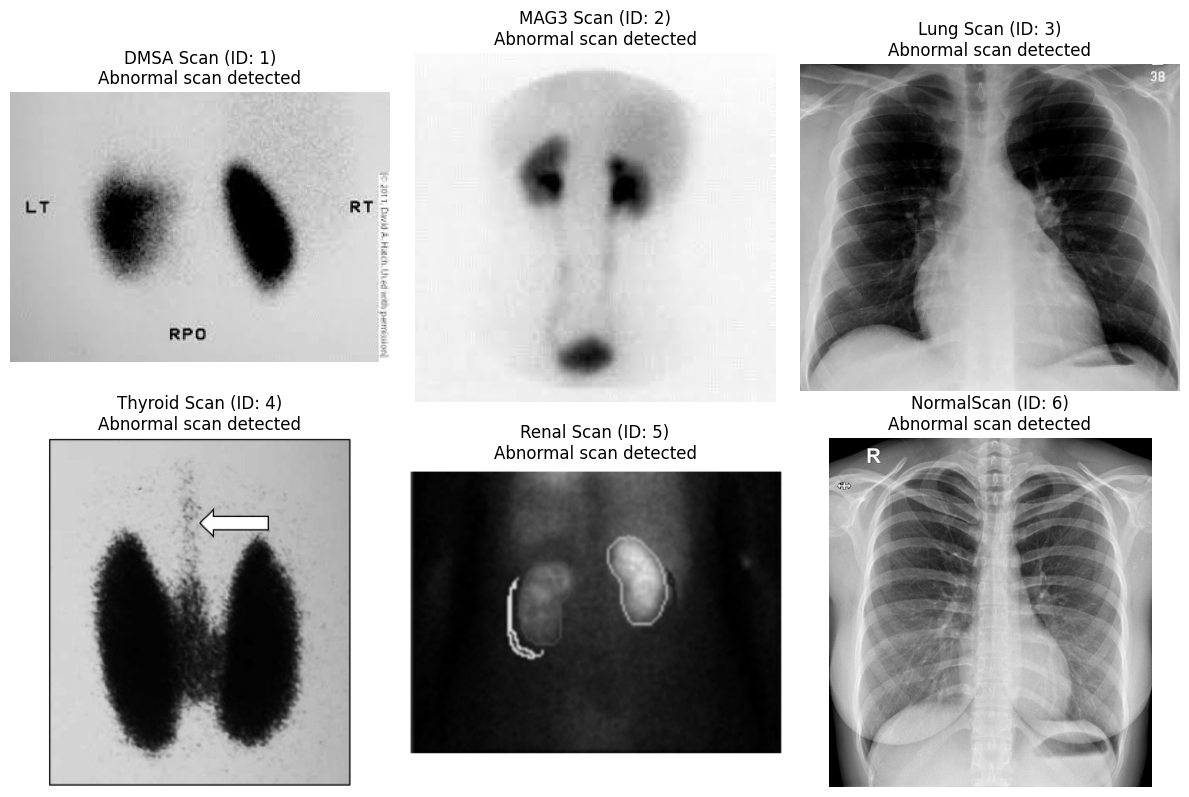

In [71]:
# Display the actual medical images
display_actual_images_with_diagnosis(file_paths, titles)
